In [5]:

import kagglehub
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
from tensorflow import keras
from tensorflow.keras import models, layers, Sequential
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Load Dataset

In [6]:
# Load object Detection dataset

dataset = kagglehub.dataset_download('gjeevanm/object-detection-dataset')

train_path = dataset + '/tusimple_preprocessed/training'


In [7]:
# Create a generator and get the images from the directory
img_generator = keras.preprocessing.image.ImageDataGenerator()
seed = 10
images_set = img_generator.flow_from_directory(
    train_path,
    shuffle=False,
    batch_size=64,
    class_mode='binary',
    target_size=(256, 320)
)

Found 7252 images belonging to 2 classes.


# EDA

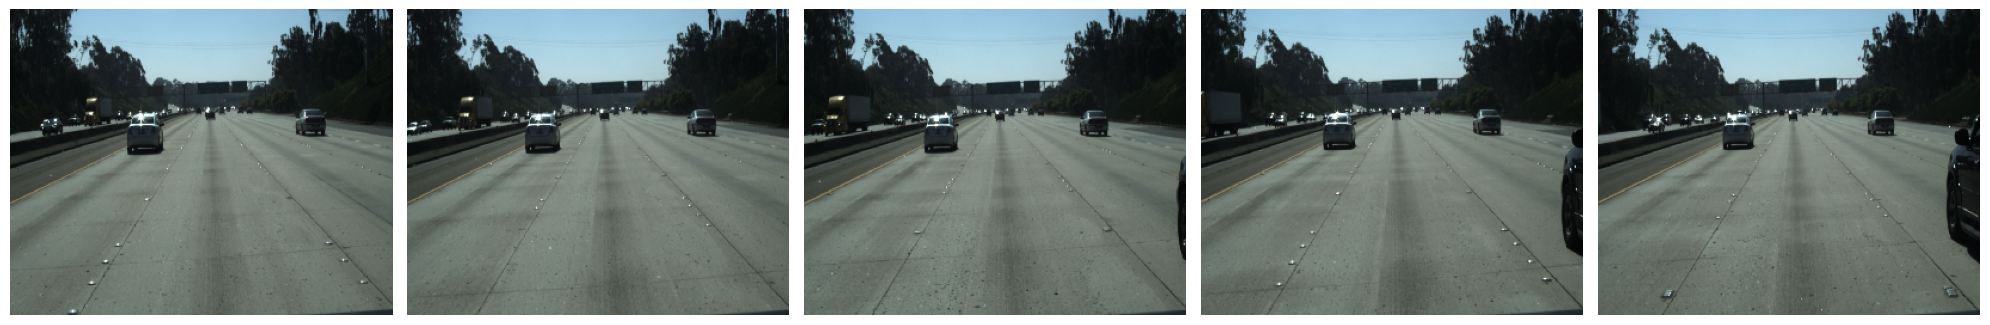

In [8]:
images, labels = next(images_set)

# Normalize images
if images.max() > 1.0:
    images = images / 255.0

# Display the images
def plot_images(images_arr):
    fig, axes = plt.subplots(1, len(images_arr), figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Plot the first 5 images in the batch
plot_images(images[:5])

# Image Shapes

In [9]:
print(f"Shape of images: {images.shape}")
print(f"Shape of labels: {labels.shape}")

Shape of images: (64, 256, 320, 3)
Shape of labels: (64,)


# Image Statistics

In [10]:
def display_image_statistics(images):
    print(f"Min pixel value: {images.min()}")
    print(f"Max pixel value: {images.max()}")
    print(f"Mean pixel value: {images.mean()}")
    print(f"Standard deviation of pixel values: {images.std()}")

display_image_statistics(images)

Min pixel value: 0.0
Max pixel value: 1.0
Mean pixel value: 0.38252881169319153
Standard deviation of pixel values: 0.21561965346336365


# Image Distribution

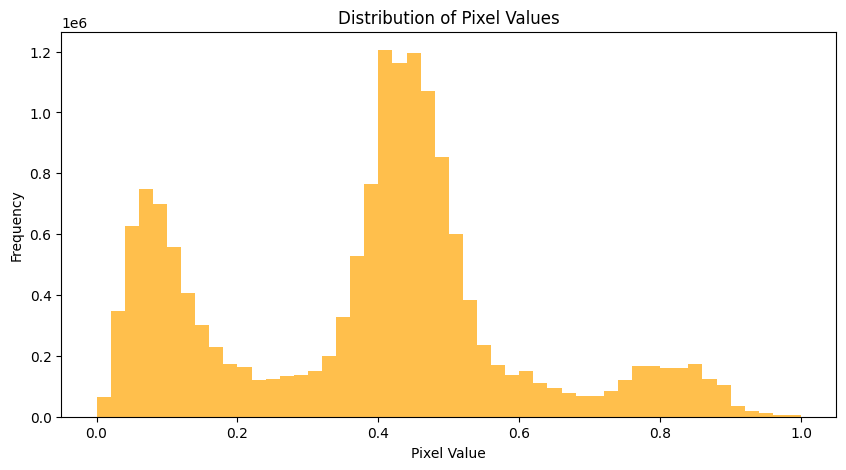

In [11]:
def visualize_image_distribution(images):
    plt.figure(figsize=(10, 5))
    plt.hist(images.ravel(), bins=50, color='orange', alpha=0.7)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.title('Distribution of Pixel Values')
    plt.show()

visualize_image_distribution(images)

# Augmented Images

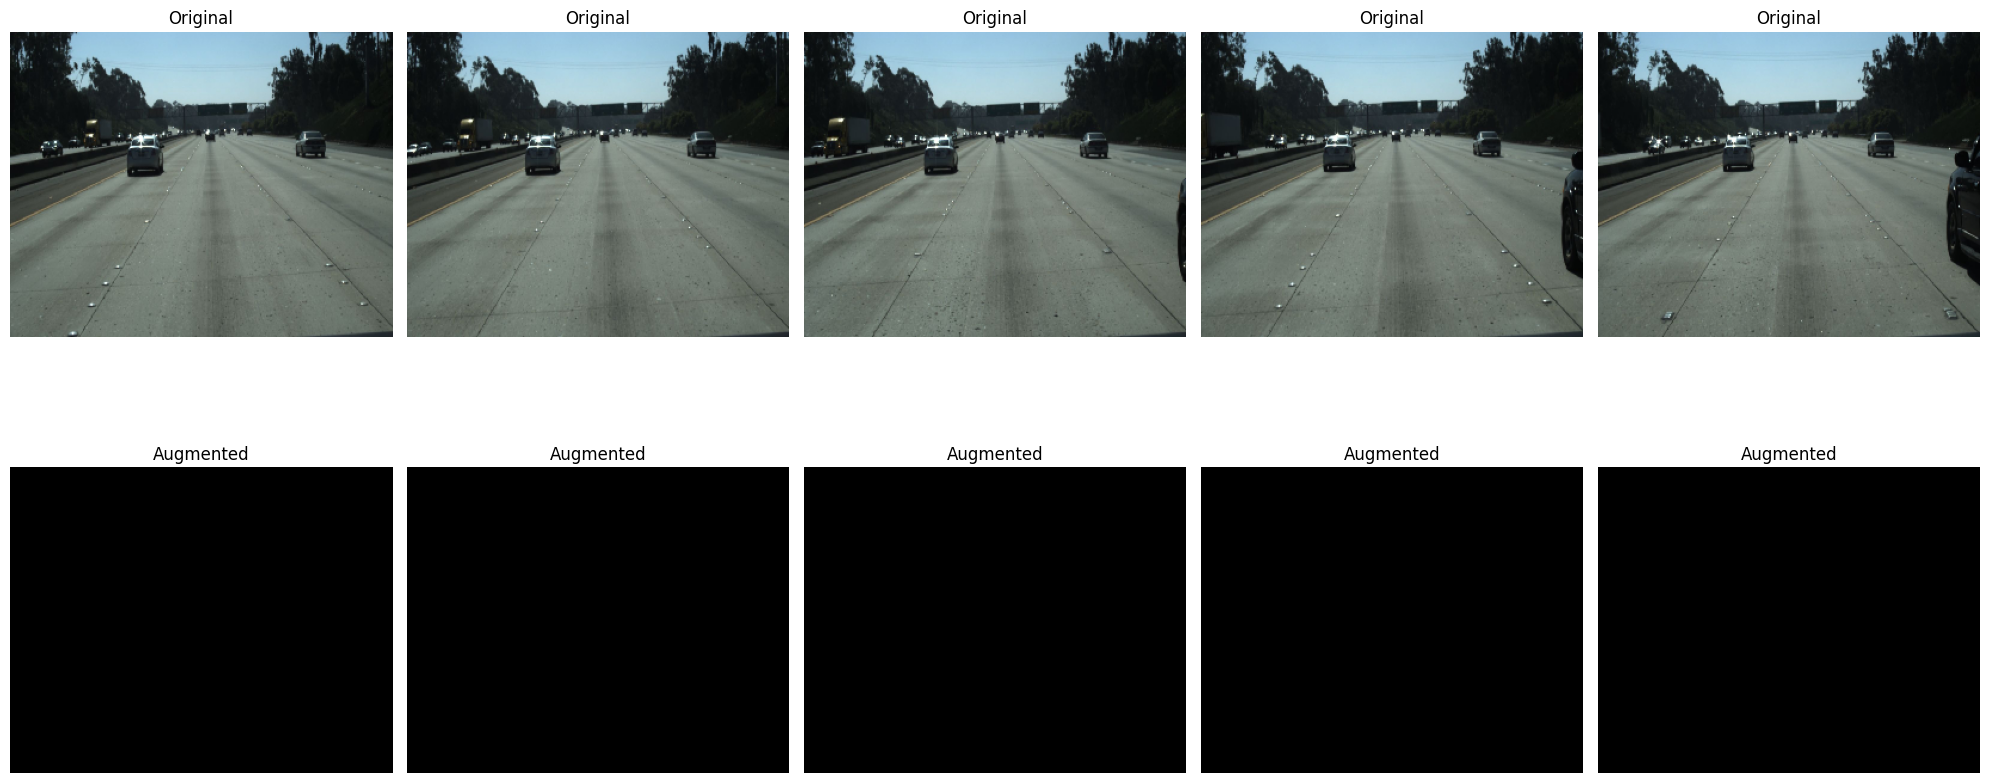

In [12]:
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

def display_augmented_images(images, datagen, num_images=5):
    fig, axes = plt.subplots(2, num_images, figsize=(20, 10))
    for i in range(num_images):
        img = images[i]
        img = np.expand_dims(img, axis=0)
        aug_iter = datagen.flow(img)
        aug_img = next(aug_iter)[0].astype('uint8')
        axes[0, i].imshow(images[i])
        axes[0, i].axis('off')
        axes[0, i].set_title('Original')
        axes[1, i].imshow(aug_img)
        axes[1, i].axis('off')
        axes[1, i].set_title('Augmented')
    plt.tight_layout()
    plt.show()

display_augmented_images(images, datagen)

# Preprocessing

In [13]:
images, labels = next(images_set)


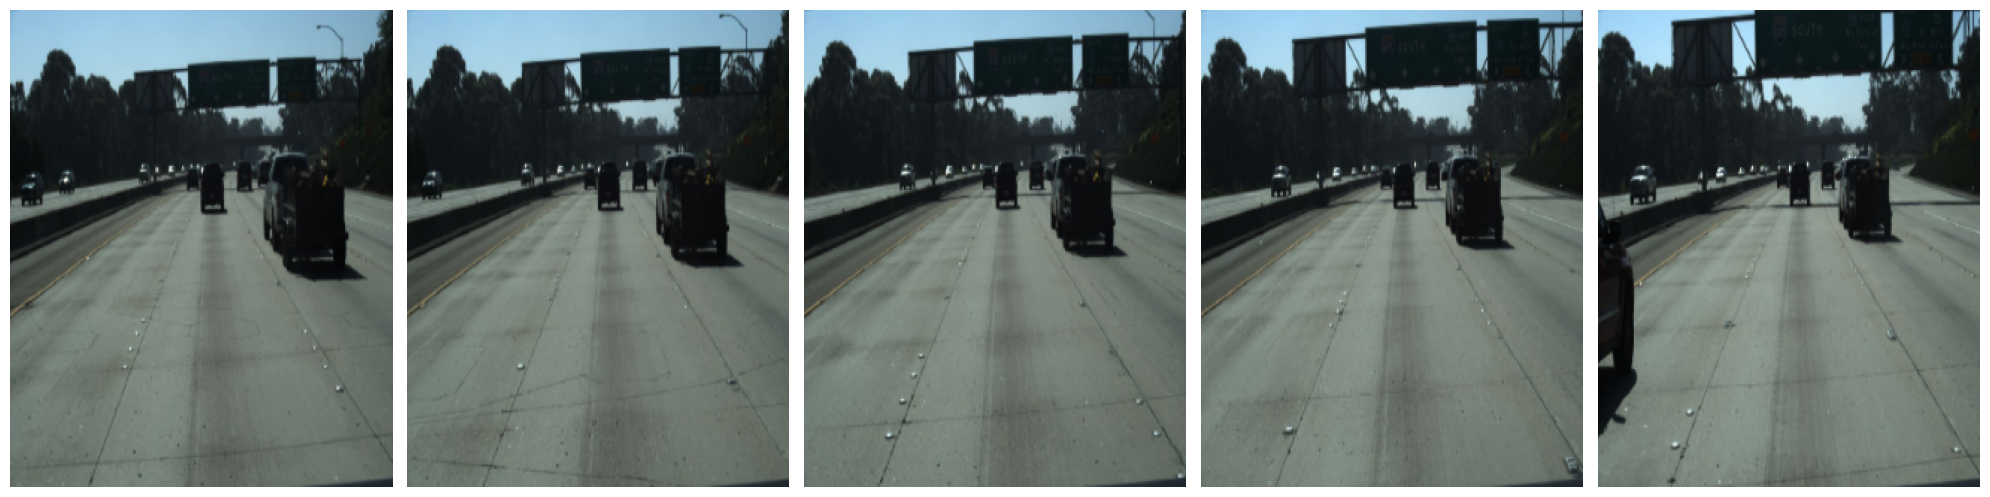

In [14]:
def preprocess_images(images):
    processed_images = []
    for image in images:
        # Resize image to target size
        image = cv2.resize(image, (256, 320))
        # Normalize image to [0, 1]
        image = image / 255.0
        processed_images.append(image)
    return np.array(processed_images)

processed_images = preprocess_images(images)

def plot_images(images_arr):
    fig, axes = plt.subplots(1, len(images_arr), figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plot_images(processed_images[:5])